# Inferential Statistics

## 1. Calculate a 95% confidence interval for the mean of a given dataset using scipy.stats.


In [1]:
import numpy as np
from scipy import stats

In [8]:
Data=[75, 80, 85, 70, 90, 88, 77, 84, 69, 79]
Mean=np.mean(Data)#sample mean
sem=stats.sem(Data)#standard error of the mean-how much the sample mean might differ from true population mean
confidence=0.95
df=len(Data)-1 #degrees of freedom-no of independent values
confidence_interval=stats.t.interval(confidence,df,loc=Mean,scale=sem)
print("Find the confidence_interval:",confidence_interval)

Find the confidence_interval: (np.float64(74.58521201802404), np.float64(84.81478798197597))


## 2. Generate samples from any distribution and show how sample means form a normal distribution.


Central Limit Theorem (CLT):
If you take many samples from a non-normal distribution (like exponential), and calculate the mean of each sample, those means will form a normal distribution as the number of samples increases.

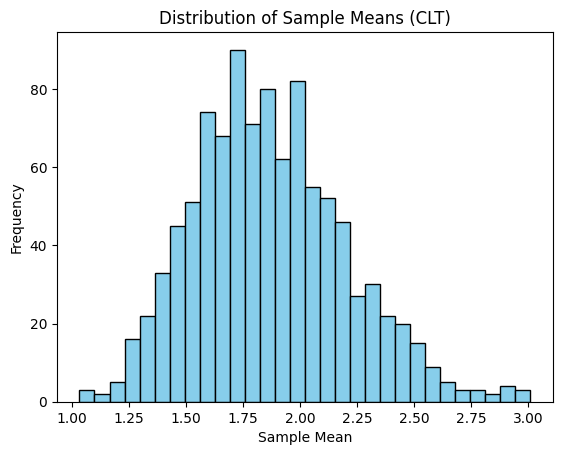

In [14]:
import numpy as np
from matplotlib import pyplot as plt

samples_expo=np.random.exponential(scale=2.0, size=1000) #generated exponential samples
Mean_samples=[]
for i in range(1000):
    batch_of_30_samples=np.random.choice(samples_expo,size=30,replace=True)# batch of 30 samples
    Mean_samples.append(np.mean(batch_of_30_samples))
plt.hist(Mean_samples, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Sample Means (CLT)")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

## 3. Plot how confidence interval width changes with increasing sample size

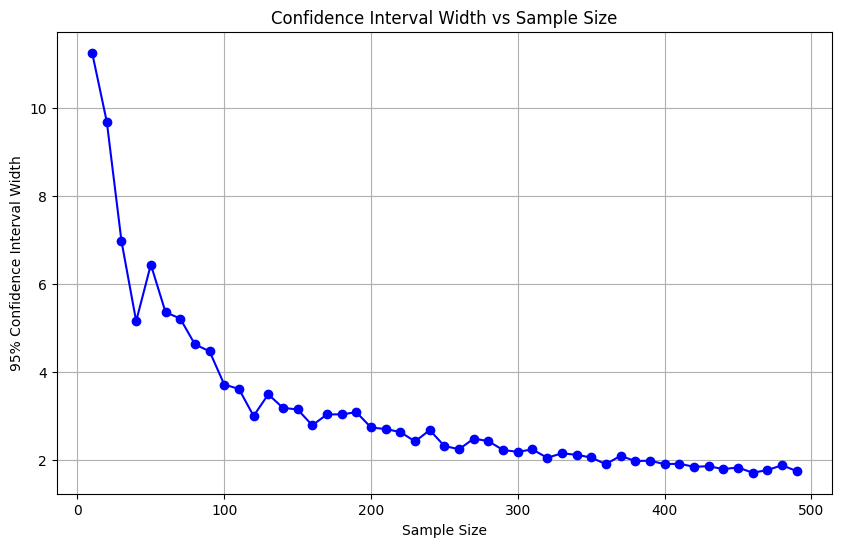

In [25]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

population_sample=np.random.normal(loc=50, scale=10, size=10000)
sample_sizes=range(10,500,10)

ci_width=[]
for n in range(10,500,10):
    Batch_samples=np.random.choice(population_sample,size=n,replace=False)
    Batch_samples_mean=np.mean(Batch_samples)
    sem=stats.sem(Batch_samples)
    confidence=0.95
    df=n-1
    confidence_intervals=stats.t.interval(confidence,df,loc=Batch_samples_mean,scale=sem)
    # CI width = upper - lower
    width = confidence_intervals[1] - confidence_intervals[0]
    ci_width.append(width)
    
plt.figure(figsize=(10, 6))
plt.plot( sample_sizes,ci_width,
    color='blue', marker='o')
plt.title("Confidence Interval Width vs Sample Size")
plt.xlabel("Sample Size")
plt.ylabel("95% Confidence Interval Width")
plt.grid(True)
plt.show()
#As sample size increases, the CI width drops.

## 4. Calculate z-scores for all values in a dataset and interpret their meaning.

In [27]:
import numpy as np
from scipy.stats import zscore

data = np.array([10, 12, 15, 20, 22])
z_scores = zscore(data)

print("Original data:", data)
print("Z-scores:", z_scores)

Original data: [10 12 15 20 22]
Z-scores: [-1.26687088 -0.83001885 -0.17474081  0.91738926  1.35424129]


### Let’s say for one value:

* z = 0: The value is exactly the mean

* z = 1.5: The value is 1.5 standard deviations above the mean

* z = -2: The value is 2 standard deviations below the mean

* z > 2 or z < -2: These values are unusual or outliers